### 5η Εργαστηριακή Άσκηση

#### Όνομα: Αλεξανδρόπουλος Σταμάτης

#### Αριθμός Μητρώου: 03117060


### Παραδοτέο 1

#### Ερώτημα 1 
Στην απλή μέθοδο Monte Carlo εκτιμάμε τη μέση τιμή μιας τυχαίας μεταβλητής από τον μέσο όρο ενός μεγάλου αριθμού **ανεξάρτητων** δειγμάτων της μεταβλητής. Δηλαδή, προκειμένου να εκτιμήσουμε την $\mathbb{E}\big[X\big]$, χρησιμοποιούμε την εκτιμήτρια $ M_N=\frac{X_1+\cdots X_N}{N}$, όπου οι $X_1,\ldots,X_N$ είναι ανεξάρτητα δείγματα της τ.μ. $X$. Στον κώδικα παραπάνω όμως δεν πήραμε $N$ **ανεξάρτητες** πραγματοποιήσεις της αλυσίδας μας. Παρατηρήστε ότι καλέσαμε την `mc.start()` μόνο μια φορά. Αντ' αυτών πήραμε $N$ εκδρομές της ίδιας αλυσίδας γύρω από την κατάσταση 1. 
 
Ποιο είναι το μαθηματικό αποτέλεσμα μας εξασφαλίζει ότι η προσέγγισή μας είναι σωστή; 

*Απάντηση*

Εκτελέσαμε την εντολή mc.start() μία φορά γιατί κάθε φορά που επιστρέφει η αλυσίδα στην κατάσταση 1 αυτό είναι χρόνος διακοπής. Αρα από την Ισχυρή Μαρκοβιανή ιδιότητα η αλυσίδα ανανεώνεται στους χρόνους διακοπής και έχει τον ίδιο πίνακα μεταβάσεων με την αρχική αλυσίδα .


#### Ερώτημα 2
Τροποποιήστε τον παραπάνω κώδικα ώστε να υπολογίζει προσεγγιστικά την κατανομή $\pi_1$ του Θεωρήματος 21. Τρέξτε μερικές (2-3) φορές τον κώδικά σας ώστε να αποκτήσετε μια ιδέα για τη διασπορά της εκτίμησής σας.

Υπολογίστε θεωρητικά την αναλλοίωτη κατανομή της αλυσίδας (δεν χρειάζεται να δείξετε τις πράξεις σας).  Συμφωνεί το αριθμητικό αποτέλεσμα που βρήκατε με τον θεωρητικό υπολογισμό;

In [1]:
from simple_markov_chain_lib import markov_chain
from statistics import mean
import numpy as np

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

#For each state we change the init_dist
init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.
mc = markov_chain(markov_table, init_dist)

N = 100_000

##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 

mc.start()
completed = 0
check=[]
counter=0
##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    counter+=1
    if mc.running_state == 1:
        check.append(counter)
        completed +=1
        counter=0

m=mean(check)
for x, y in visits.items():
    print("%d: %.3f" % (x, (y / N)/m))

1: 0.186
2: 0.093
3: 0.464
4: 0.257


Τρέχωντας τον παραπάνω κώδικα 4 φορές,  παρατηρούμε ότι οι τιμές που προκύπτουν δεν αποκλείνουν σχεδόν καθόλου από επανάλληψη σε επανάλληψη.Τα αποτελέσματα του θεωρητικού υπολογίσμού της κατανομής είναι (0.1855567, 0.092784, 0.463918, 0.257732) που συμφωνεί με το αριθμητικό αποτέλεσμα που βρήκαμε για την την κατανομή $π_1$ .


#### Ερώτημα 3

Αλλάξτε τώρα την αρχική κατάσταση στον κώδικά σας ώστε να υπολογίσετε προσεγγιστικά τις κατανομές $\pi_2$, $\pi_3$, $\pi_4$. Τι παρατηρείτε; Σε ένα κελί κειμένου δείξτε μόνο τις αλλαγές που πρέπει να γίνουν στον κώδικα που γράψατε παραπάνω και γράψτε το σχόλιό σας.

In [2]:
from simple_markov_chain_lib import markov_chain
from statistics import mean
import numpy as np

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

for states in [1,2,3,4]:
    init_dist = {states: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.
    mc = markov_chain(markov_table, init_dist)

    N = 100_000

    ##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
    visits = {state: 0 for state in (1, 2, 3, 4)} 

    mc.start()
    completed = 0
    check=[]
    counter=0
    ##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
    while completed < N:
        visits[mc.running_state] += 1
        mc.move()
        counter+=1
        if mc.running_state == states:
            check.append(counter)
            completed +=1
            counter=0

    m=mean(check)
    print('Expected distribution starting from {0} :'.format(states))
    for x, y in visits.items():
        print("%d: %.3f" % (x, (y / N)/m))

Expected distribution starting from 1 :
1: 0.186
2: 0.093
3: 0.465
4: 0.256
Expected distribution starting from 2 :
1: 0.185
2: 0.093
3: 0.465
4: 0.257
Expected distribution starting from 3 :
1: 0.185
2: 0.093
3: 0.465
4: 0.257
Expected distribution starting from 4 :
1: 0.186
2: 0.093
3: 0.464
4: 0.257


Ουσιαστικά στο μέρος αυτό απλά εισάγουμε ένα for loop για να δοκιμάσουμε τις κατανομές . Παρατηρούμε ότι η κατανομή δεν αλλάζει όσο αλλάζουμε καταστάσεις εκκίνησης κάτι το οποίο είναι αναμενόμενο.


### Άσκηση 2 

#### Ερώτημα 1

Θεωρήστε $N=10^6$ δείγματα στον κύβο με κέντρο το (0,0,0) και πλευρά 2. Τροποποιήστε τους δοσμένους κώδικες ώστε να εκτιμήσετε αριθμητικά τον όγκο της μοναδιαίας σφαίρας σε 3 διαστάσεις και συγκρίνετε με τη θεωρητική τιμή $V(3) = \frac{4 \pi}{3}$. Ο κώδικάς σας θα πρέπει να τυπώνει την εκτιμώμενη τιμή του $V(3)$, τη θεωρητική του τιμή και το σχετικό σφάλμα της εκτίμησης. 

In [3]:
from numpy import random, pi

Ntrials, Nhits = 1000000,0
for n in range(Ntrials):
    x, y,z = random.uniform(-1, 1, 3) # draw 2 samples, each uniformly distributed over (-1,1)
    if x**2 + y**2 +z**2 < 1:
        Nhits += 1

print("Monte Carlo estimator of V(3): %.5f" % ((8 * Nhits / Ntrials)))
print("Actual value of V(3) up to 5 decimal digits: %.5f" % (4*pi/3))
print("The relative error is %.5f%%" % (100 * abs(1- (8 * Nhits)/(4*pi * Ntrials/3))))

Monte Carlo estimator of V(3): 4.18993
Actual value of V(3) up to 5 decimal digits: 4.18879
The relative error is 0.02716%


#### Ερώτημα 2

Τροποποιήστε τους δοσμένους κώδικες ώστε να πάρετε ένα δείγμα $N=10.000$ σημείων με ομοιόμορφη κατανομή στον λημνίσκο  

$$L = \{(x, y) \in \mathbb{R}^2: {\left(x^2 + y^2 \right)}^2 \leq 2|xy|\, \}$$

Ο κώδικάς σας θα πρέπει επίσης 

1. να κατασκευάζει ένα διάγραμμα όπου τα σημεία που απορρίψατε και τα σημεία του $L$ θα φαίνονται με διαφορετικό χρώμα 
2. να επιστρέφει το πλήθος των δειγμάτων στο $S$ που χρειάστηκαν για την παραγωγή $N$ δειγμάτων στον λημνίσκο $L$ 

In [4]:
import math
# Parameters
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 < 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the limnisk %d" % N)
print("Monte Carlo estimator of volume of the limnisk: %.5f" % ( 4*N/ Ntrials))

Total number of samples drawn 19908
Number of samples in the limnisk 10000
Monte Carlo estimator of volume of the limnisk: 2.00924


Στη συνέχεια δημιουργούμε ένα διάγραμμα με όλα τα σημεία που δημιουργήσαμε.
Τα σημεία που ανήκουν στον δίσκο χρωματίζονται πράσινα ενώ τα σημεία που δεν ανήκουν στο δίσκο χρωματίζονται κόκκινα.

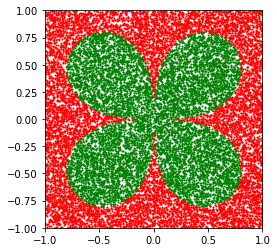

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

#### Ερώτημα 3

Γράψτε έναν κώδικα που εκτιμά το εμβαδόν του λημνίσκου $L$ και την τιμή του ολοκληρώματος

$$ I = \iint_{L}\, |x + y| \, {dxdy} $$

(Υπόδειξη: Αν $X=(X_1,X_2)$ είναι ένα τυχαίο διάνυσμα με ομοιόμορφη κατανομή στον λημνίσκο $L$, τότε η ποσότητα $I/|\, L\,|$ είναι η μέση τιμή $\mathbb{E}\big[\,|\,X_1+X_2\,|\,\big]$. Όταν μπορούμε να φανταστούμε κάτι ως μέση τιμή, τότε μπορούμε να το εκτιμήσουμε αριθμητικά με Monte Carlo.)


In [6]:
from statistics import mean
sum=[]
for i in range(np.size(acc_x)):
    sum.append(abs(acc_x[i]+acc_y[i]))
m=np.sum(sum)/np.size(acc_x)
I_result=m*4*N/Ntrials
print("Monte Carlo estimator of volume of the double integral I: %.5f" % (I_result))

Monte Carlo estimator of volume of the double integral I: 1.00345
